In [1]:
import warnings; warnings.simplefilter('ignore')
import scipy, itertools, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

plt.style.use('bmh'); sns.set()

In [2]:
pip install darts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import warnings; warnings.simplefilter('ignore'); warnings.filterwarnings('ignore', module='darts'); warnings.filterwarnings('ignore', module='pandas')
import numpy as np, darts, sys, pandas as pd
from darts import metrics

SEED = 0


In [4]:
pip install dysts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
from dysts.datasets import load_dataset

data = 'Sakarya'
train_ = load_dataset(subsets="train", data_format="pandas", univariate=False).loc[data]
test_ = load_dataset(subsets="test", data_format="pandas", univariate=False).loc[data] #kenapa dibagi disini pada di bawah juga dibagi lagi, apakah memang sudah dari sananya dibagi

df = pd.concat([train_, test_], axis=0).reset_index()
# Hati-hati versi terbaru harus "reset_index" kalau ndak cell selanjutnya error
print(df.shape)
df.head() 

(2000, 13)


,index,id,time,values_0,values_1,values_2,values_3,values_4,values_5,values_6,values_7,values_8,values_9
0,Sakarya,89.0,0.000000,0.509628,-1.742051,1.219323,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Sakarya,89.0,0.049886,0.212319,-1.600700,1.410919,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Sakarya,89.0,0.099771,-0.067432,-1.516614,1.540370,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Sakarya,89.0,0.149657,-0.333769,-1.493272,1.615232,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Sakarya,89.0,0.199542,-0.593283,-1.529812,1.635646,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
print(df.isnull().sum())

index       0
id          0
time        0
values_0    0
values_1    0
values_2    0
values_3    0
values_4    0
values_5    0
values_6    0
values_7    0
values_8    0
values_9    0
dtype: int64


In [7]:
df.describe()

,id,time,values_0,values_1,values_2,values_3,values_4,values_5,values_6,values_7,values_8,values_9
count,2000.0,2000.000000,2.000000e+03,2.000000e+03,2.000000e+03,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0
mean,89.0,24.917843,-1.225686e-16,-1.421085e-17,9.174883e-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,14.404318,1.000250e+00,1.000250e+00,1.000250e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,89.0,0.000000,-3.007253e+00,-3.377478e+00,-3.700817e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,89.0,12.458921,-7.106713e-01,-6.076109e-01,-6.012374e-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,89.0,24.917843,-5.381439e-02,-1.456247e-01,5.508101e-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,89.0,37.376764,7.586488e-01,7.632252e-01,6.175902e-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,89.0,49.835686,2.950681e+00,3.391711e+00,3.210621e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


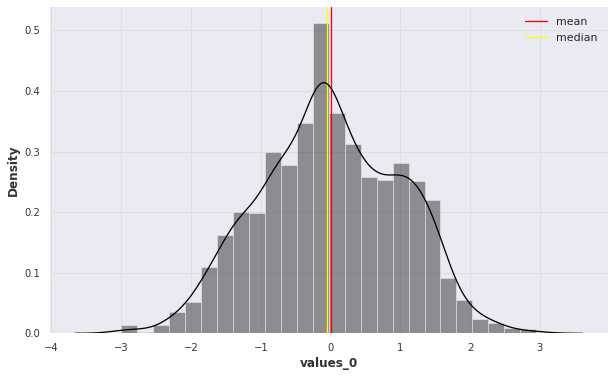

In [8]:
plt.figure(figsize = (10, 6))
plt.axvline(df['values_0'].describe()['mean'], color = 'red', label = 'mean')
plt.axvline(df['values_0'].describe()['50%'], color = 'yellow', label = 'median')
sns.distplot(df['values_0'])
plt.legend()

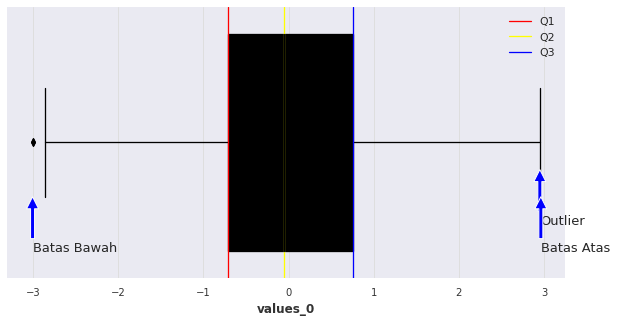

In [9]:
plt.figure(figsize = (10, 5))
sns.boxplot(df['values_0'])
plt.axvline(df['values_0'].describe()['25%'], color = 'red', label = 'Q1')
plt.axvline(df['values_0'].describe()['50%'], color = 'yellow', label = 'Q2')
plt.axvline(df['values_0'].describe()['75%'], color = 'blue', label = 'Q3')
plt.annotate('Outlier', (df['values_0'].describe()['max'],0.1), xytext = (df['values_0'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = df['values_0'].describe()['75%'] - df['values_0'].describe()['25%']
plt.annotate('Batas Atas', (df['values_0'].describe()['75%'] + 1.5*IQR, 0.2), 
             xytext = (df['values_0'].describe()['75%'] + 1.5*IQR, 0.4),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
plt.annotate('Batas Bawah', (df['values_0'].describe()['min'], 0.2), 
             xytext = (df['values_0'].describe()['min'], 0.4),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
plt.legend()

In [10]:
pip install nolds

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import nolds
import numpy as np
import matplotlib.pyplot as plt

In [17]:
pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
import plotly.graph_objects as go
import numpy as np 
import pandas as pd 
import plotly.express as px

In [25]:
fig = px.line(df, x='time', y='values_0', color='id')
fig.show()